<a href="https://colab.research.google.com/github/Bahrombekk/pytorch/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Copy_of_MNIST_Homework_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading a Dataset

In [1]:
!wget https://pjreddie.com/media/files/mnist_test.csv

--2023-06-24 08:31:12--  https://pjreddie.com/media/files/mnist_test.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [application/octet-stream]
Saving to: ‘mnist_test.csv’

mnist_test.csv      100%[===================>]  17.44M  24.7MB/s    in 0.7s    

2023-06-24 08:31:13 (24.7 MB/s) - ‘mnist_test.csv’ saved [18289443/18289443]



# Import Required Library

In [11]:
from torch import nn
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


# Load Dataset

In [12]:
data =pd.read_csv("/content/mnist_test.csv")
data

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data=np.array(data)

In [14]:
x = data[:, 1:]
y = data[:, 0]

In [15]:
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [16]:
print(x.shape, y.shape)

torch.Size([9999, 784]) torch.Size([9999])


# Train and Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.33, random_state=42)

# MODEL

In [18]:
class Net(torch.nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_features=input, out_features=64)
        self.fc2 = torch.nn.Linear(in_features=64, out_features=64)
        self.fc3 = torch.nn.Linear(in_features=64, out_features=output)
        self.relu = torch.nn.ReLU()
        self.softmax =torch.nn.Softmax(dim=1)
        # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        out = self.softmax(self.fc3(x))
        return out

# Create Model

In [19]:
model = Net(input=784,output=10)

In [20]:
criterion = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

In [21]:
def accuracy(y_pred, y):
  """
  Calculate accuracy
  """
  # CODE
  y_pred = y_pred.argmax(axis=1)
  acc = sum(y_pred == y)/len(y)
  return acc

In [22]:
history = {'loss':[], 'loss_val':[], 'accuracy':[], 'val_accuracy':[]}

In [23]:
epochs =450
for epoch in range(epochs):


    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    y_hat = model(x_train)

    # get loss for the predicted output
    loss = criterion(y_hat, y_train)
    loss_val = criterion(model(x_test), y_test)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    # pred_label_train = torch.argmax(y_hat,dim=1)
    # accuracy = f1_score(y_train, pred_label_train,average='macro')
    acc = accuracy(y_hat,y_train)
    val_acc = accuracy(model(x_test), y_test)

    history['loss'].append(loss.item())
    history['loss_val'].append(loss_val.item())
    history['accuracy'].append(acc.item())
    history['val_accuracy'].append(val_acc.item())

    if epoch%10==0:

      print(f'epoch {epoch}, loss {loss.item():.3f} Accuracy {acc:.2f}  Validation Accuracy: {val_acc:.2f}')

epoch 0, loss 2.325 Accuracy 0.11  Validation Accuracy: 0.33
epoch 10, loss 1.720 Accuracy 0.74  Validation Accuracy: 0.74
epoch 20, loss 1.610 Accuracy 0.85  Validation Accuracy: 0.82
epoch 30, loss 1.591 Accuracy 0.87  Validation Accuracy: 0.84
epoch 40, loss 1.581 Accuracy 0.88  Validation Accuracy: 0.84
epoch 50, loss 1.577 Accuracy 0.88  Validation Accuracy: 0.84
epoch 60, loss 1.575 Accuracy 0.89  Validation Accuracy: 0.85
epoch 70, loss 1.573 Accuracy 0.89  Validation Accuracy: 0.85
epoch 80, loss 1.572 Accuracy 0.89  Validation Accuracy: 0.85
epoch 90, loss 1.570 Accuracy 0.89  Validation Accuracy: 0.85
epoch 100, loss 1.569 Accuracy 0.89  Validation Accuracy: 0.85
epoch 110, loss 1.568 Accuracy 0.89  Validation Accuracy: 0.85
epoch 120, loss 1.568 Accuracy 0.89  Validation Accuracy: 0.85
epoch 130, loss 1.567 Accuracy 0.89  Validation Accuracy: 0.85
epoch 140, loss 1.567 Accuracy 0.89  Validation Accuracy: 0.85
epoch 150, loss 1.566 Accuracy 0.89  Validation Accuracy: 0.85
epo

In [24]:
pred = model(x_test[:100])

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [26]:
pred = pred.argmax(axis=1)
pred

tensor([4, 7, 9, 1, 7, 8, 3, 4, 8, 0, 6, 0, 2, 6, 4, 6, 2, 3, 6, 8, 7, 9, 8, 2,
        1, 3, 9, 0, 0, 4, 9, 2, 8, 6, 8, 9, 1, 9, 1, 3, 6, 7, 3, 2, 6, 1, 8, 8,
        9, 3, 0, 6, 7, 0, 6, 8, 7, 7, 8, 0, 1, 2, 8, 9, 1, 9, 6, 0, 8, 4, 2, 8,
        4, 8, 1, 2, 0, 2, 1, 9, 9, 4, 3, 1, 7, 3, 0, 8, 4, 8, 8, 9, 3, 4, 4, 3,
        6, 3, 8, 9])

In [28]:
cm =confusion_matrix(y_test[:100],pred)

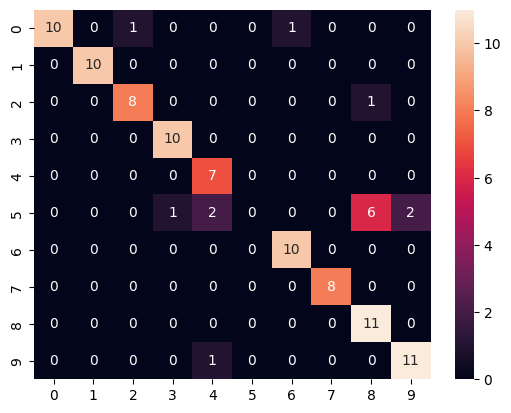

In [29]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
#loss_graph

In [30]:
def plot_accuracy(accuracy:list, val_accuracy:list, epochs:int)->None:
  lists=[i for i in range(epochs)]
  plt.plot(lists, accuracy)

  plt.plot(lists, val_accuracy)
  plt.show()

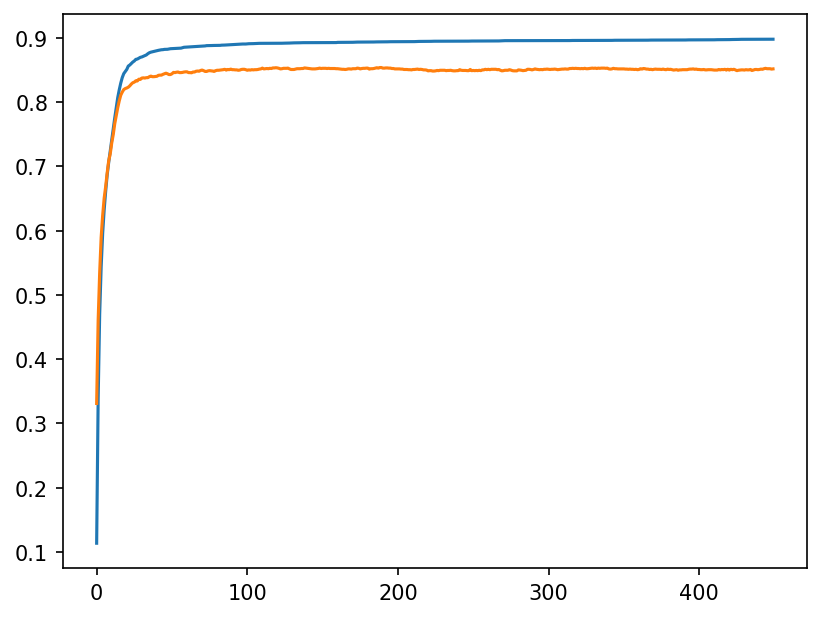

In [31]:
plt.figure(dpi=150)

plot_accuracy(history['accuracy'], history['val_accuracy'], epochs)

In [34]:
def plot_loss(loss:list, val_loss:list, epochs:int)->None:
  lists=[i for i in range(epochs)]
  plt.plot(lists, loss)

  plt.plot(lists, val_loss)
  plt.show()

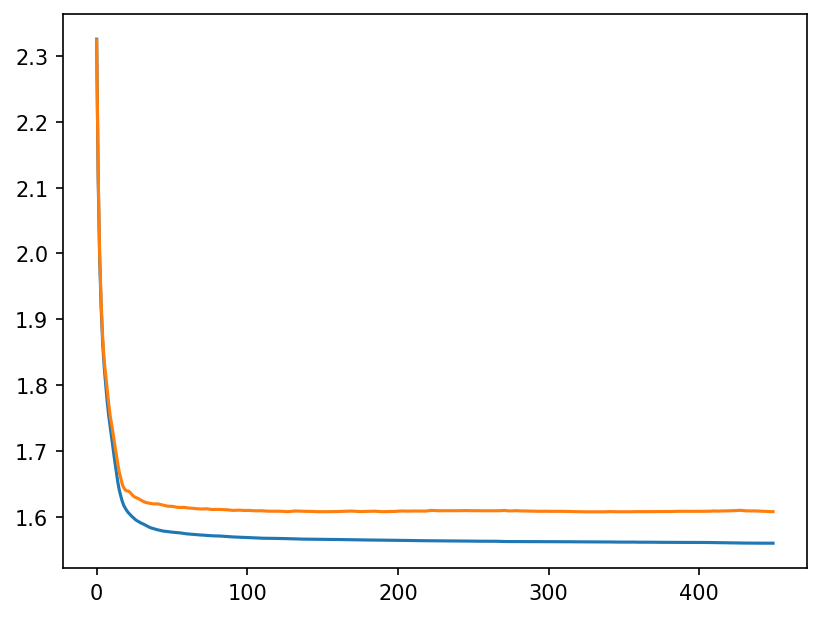

In [35]:
plt.figure(dpi=150)

plot_loss(history['loss'], history['loss_val'], epochs)